# Supervised Learning: Regression Models
## Lecture Notebook Part 2 of 6

---

## Learning Objectives

By the end of this notebook, you will be able to:
1. Understand what regression is and when to use it
2. Comprehend the mathematical foundations of linear regression
3. Implement and evaluate linear regression models
4. Understand regularization techniques (Ridge, Lasso, Elastic Net)
5. Apply polynomial regression for non-linear relationships
6. Evaluate regression models using appropriate metrics

---

## 2.1 Introduction to Regression

### What is Regression?

**Regression** is a supervised learning technique used to predict continuous numerical values. Unlike classification, which predicts discrete categories, regression models establish relationships between independent variables (features) and a dependent variable (target) to make numerical predictions.

Regression models work by learning a mathematical function that maps input features to a continuous output. This function captures the underlying relationship between the features and the target variable, allowing us to predict the target value for new, unseen data points. The fundamental assumption in regression is that there exists some relationship between the features and the target that can be learned from historical data.

Regression is one of the most fundamental and widely-used techniques in machine learning and statistics. It serves as the foundation for many advanced methods and is often the first approach tried when dealing with prediction problems involving continuous outcomes.

### Key Components of Regression

**Independent Variables (Features, X)**: These are the input variables used to make predictions. They can be numerical (e.g., square footage, age, temperature) or categorical (encoded appropriately). Features are the predictors that influence the target variable.

**Dependent Variable (Target, y)**: This is the continuous value we want to predict. It's called "dependent" because its value depends on the independent variables. Examples include house prices, temperature, sales revenue, or any measurable quantity.

**Coefficients/Weights (β)**: These are parameters learned during training that determine the importance and contribution of each feature. Each coefficient indicates how much the target variable changes when the corresponding feature changes by one unit (holding other features constant).

**Intercept/Bias (β₀)**: This is the baseline value of the target variable when all features are zero. It represents the expected value of y when all features are at their baseline level.

**Error Term (ε)**: This represents the difference between the predicted value and the actual value. It accounts for factors not captured by the model, including measurement errors, omitted variables, and inherent randomness in the data.

### The Regression Equation

The general form of a multiple linear regression equation is:

**y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε**

Where:
- **y** is the predicted value (dependent variable)
- **β₀** is the intercept (y-value when all features are zero)
- **β₁, β₂, ..., βₙ** are the coefficients (weights) for each feature
- **x₁, x₂, ..., xₙ** are the feature values (independent variables)
- **ε** is the error term (residual)

In matrix notation, this can be written more compactly as:

**y = Xβ + ε**

Where X is the feature matrix, β is the coefficient vector, and ε is the error vector.

### How Regression Works

The regression learning process follows these steps:

1. **Model receives training data**: The algorithm is provided with training examples containing both features (X) and target values (y).

2. **Algorithm finds optimal coefficients**: The learning algorithm determines the best values for β₀, β₁, β₂, ..., βₙ that minimize prediction error. This is typically done by minimizing a cost function.

3. **Cost function measures prediction accuracy**: The most common cost function is the **Mean Squared Error (MSE)**, which calculates the average squared difference between predicted and actual values. The goal is to minimize this error.

4. **Optimization algorithm adjusts coefficients**: Algorithms like **Gradient Descent** iteratively adjust the coefficients to reduce the cost function. Gradient descent calculates the gradient (slope) of the cost function and moves in the direction that reduces error most quickly.

5. **Final model makes predictions**: Once training is complete, the model can predict new target values by plugging feature values into the learned equation.

The beauty of regression is that it provides both predictions and interpretability - we can understand how each feature contributes to the prediction through the coefficients.

### Common Types of Regression

**Linear Regression**: Assumes a linear relationship between features and target. The simplest and most interpretable form, suitable when relationships are approximately linear.

**Polynomial Regression**: Extends linear regression by including polynomial features (x², x³, etc.), allowing the model to capture non-linear relationships while still using linear regression techniques.

**Ridge Regression**: Adds L2 regularization (penalty on sum of squared coefficients) to prevent overfitting. Useful when you have many features and want to prevent the model from becoming too complex.

**Lasso Regression**: Adds L1 regularization (penalty on sum of absolute coefficients) which can drive some coefficients to exactly zero, performing automatic feature selection. Useful when you suspect many features are irrelevant.

**Elastic Net**: Combines both L1 and L2 regularization, balancing the benefits of Ridge and Lasso regression. Particularly useful when dealing with correlated features.

### Uses and Applications

Regression models are applied across numerous domains:

- **Real Estate**: Predicting house prices based on size, location, number of bedrooms, age, and other features
- **Business**: Forecasting sales based on marketing spend, seasonality, economic indicators, and historical trends
- **Healthcare**: Estimating medical costs based on patient age, BMI, medical history, and treatment type
- **Finance**: Predicting stock prices (with appropriate caveats about market efficiency), credit risk assessment
- **Weather Forecasting**: Predicting temperature, rainfall, or other weather variables based on atmospheric conditions
- **Manufacturing**: Predicting product quality metrics based on process parameters
- **Sports Analytics**: Predicting player performance or game outcomes based on various statistics

The versatility and interpretability of regression models make them essential tools in the data scientist's toolkit.

---

## 2.2 Linear Regression

### Mathematical Foundation

**Simple Linear Regression** involves one feature and one target, with the equation:

**y = β₀ + β₁x + ε**

**Multiple Linear Regression** extends this to multiple features:

**y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε**

Linear regression makes several important assumptions:

1. **Linearity**: The relationship between features and target is linear
2. **Independence**: Observations are independent of each other
3. **Homoscedasticity**: The variance of errors is constant across all levels of features
4. **Normality**: Errors are normally distributed (important for statistical inference)
5. **No Multicollinearity**: Features are not highly correlated with each other (for multiple regression)

Violations of these assumptions don't necessarily make the model useless, but they can affect the reliability of predictions and statistical inferences.

### Ordinary Least Squares (OLS)

**Ordinary Least Squares (OLS)** is the most common method for finding optimal coefficients in linear regression. OLS minimizes the sum of squared residuals (differences between predicted and actual values).

The objective function is:

**Minimize: Σ(yᵢ - ŷᵢ)²**

Where:
- yᵢ is the actual value
- ŷᵢ = β₀ + β₁x₁ᵢ + ... + βₙxₙᵢ is the predicted value

For simple linear regression, the closed-form solutions are:

**β₁ = Σ(xᵢ - x̄)(yᵢ - ȳ) / Σ(xᵢ - x̄)²**

**β₀ = ȳ - β₁x̄**

For multiple regression, the matrix solution is:

**β = (XᵀX)⁻¹Xᵀy**

This closed-form solution is computationally efficient for small to medium datasets but can be problematic for very large datasets or when XᵀX is not invertible (e.g., due to multicollinearity).

### Gradient Descent

**Gradient Descent** is an optimization algorithm used when closed-form solutions aren't feasible or efficient. It's particularly useful for:
- Very large datasets
- Online learning scenarios
- Complex cost functions

The algorithm works by:
1. Starting with random initial values for coefficients
2. Calculating the gradient (partial derivatives) of the cost function
3. Updating coefficients in the direction that reduces the cost function
4. Repeating until convergence

The update rule is:

**βⱼ := βⱼ - α × (∂J/∂βⱼ)**

Where:
- α is the learning rate (step size)
- ∂J/∂βⱼ is the partial derivative of the cost function with respect to coefficient βⱼ

The learning rate is crucial: too small and convergence is slow; too large and the algorithm may overshoot the minimum or diverge.

### Implementation Considerations

**Feature Scaling**: While linear regression doesn't strictly require feature scaling (unlike some algorithms), it's often beneficial because:
- It can speed up gradient descent convergence
- It makes coefficients more comparable
- It's essential when using regularization

Common scaling methods include:
- **Standardization**: (x - μ) / σ (mean=0, std=1)
- **Normalization**: (x - min) / (max - min) (range 0 to 1)

**Handling Categorical Variables**: Categorical features must be encoded:
- **One-Hot Encoding**: Creates binary columns for each category
- **Label Encoding**: Assigns integer labels (use with caution)
- **Target Encoding**: Uses target variable statistics (advanced)

**Dealing with Multicollinearity**: When features are highly correlated:
- Remove redundant features
- Use regularization (Ridge, Lasso)
- Use dimensionality reduction techniques
- Collect more data

### Evaluation Metrics

**Mean Squared Error (MSE)**:
MSE = (1/n) × Σ(yᵢ - ŷᵢ)²

MSE penalizes large errors more heavily due to squaring. It's always non-negative, with lower values indicating better performance. However, MSE is in squared units of the target variable, which can be difficult to interpret.

**Root Mean Squared Error (RMSE)**:
RMSE = √MSE

RMSE is in the same units as the target variable, making it more interpretable. It's the standard deviation of prediction errors.

**Mean Absolute Error (MAE)**:
MAE = (1/n) × Σ|yᵢ - ŷᵢ|

MAE is less sensitive to outliers than MSE because it doesn't square the errors. It represents the average magnitude of prediction errors.

**R² Score (Coefficient of Determination)**:
R² = 1 - (SS_res / SS_tot)

Where:
- SS_res = Σ(yᵢ - ŷᵢ)² (sum of squared residuals)
- SS_tot = Σ(yᵢ - ȳ)² (total sum of squares)

R² ranges from 0 to 1 (can be negative for very poor models):
- R² = 1: Perfect predictions
- R² = 0: Model performs as well as predicting the mean
- R² < 0: Model performs worse than predicting the mean

R² represents the proportion of variance in the target variable explained by the model. It's a popular metric because it's scale-independent and intuitive.

---

## 2.3 Regularization Techniques

### Ridge Regression (L2 Regularization)

**Ridge Regression** adds a penalty term to the cost function that penalizes large coefficients. The objective function becomes:

**Minimize: MSE + λΣβᵢ²**

Where λ (lambda or alpha) is the regularization strength parameter.

**Purpose**: Ridge regression prevents overfitting by shrinking coefficients toward zero without eliminating them entirely. It's particularly useful when:
- You have many features that might all be somewhat relevant
- Features are correlated (multicollinearity)
- You want to reduce model complexity

**Effect**: All coefficients are reduced proportionally, but none are set to exactly zero. This means Ridge keeps all features but reduces their impact, making the model more robust to small changes in the data.

**Choosing λ**:
- λ = 0: No regularization (standard linear regression)
- Small λ: Light regularization, coefficients slightly reduced
- Large λ: Heavy regularization, coefficients heavily shrunk toward zero
- λ → ∞: All coefficients approach zero, model predicts the mean

Ridge regression is particularly effective when dealing with datasets where the number of features is large relative to the number of samples.

### Lasso Regression (L1 Regularization)

**Lasso Regression** (Least Absolute Shrinkage and Selection Operator) adds a penalty on the sum of absolute values of coefficients:

**Minimize: MSE + λΣ|βᵢ|**

**Purpose**: Lasso performs automatic feature selection by driving some coefficients to exactly zero. This is useful when:
- You suspect many features are irrelevant
- You want a simpler, more interpretable model
- You have more features than samples

**Effect**: Unlike Ridge, Lasso can completely eliminate features by setting their coefficients to zero. This creates sparse models with fewer features, which can improve interpretability and reduce overfitting.

**Geometric Interpretation**: The L1 penalty creates a diamond-shaped constraint region, which often intersects the cost function at corners where coefficients are zero. This is why Lasso performs feature selection.

**Limitations**:
- When features are highly correlated, Lasso tends to arbitrarily select one and ignore others
- With more features than samples, Lasso can select at most n features (where n is the number of samples)

### Elastic Net

**Elastic Net** combines both L1 and L2 penalties:

**Minimize: MSE + λ[αΣ|βᵢ| + (1-α)Σβᵢ²]**

Where:
- λ controls overall regularization strength
- α controls the mix between L1 and L2 (α=1 is pure Lasso, α=0 is pure Ridge)

**Purpose**: Elastic Net balances the benefits of both Ridge and Lasso:
- Like Lasso, it can perform feature selection
- Like Ridge, it handles correlated features better than Lasso alone
- More stable than Lasso when features are highly correlated

**When to Use**: Elastic Net is particularly useful when:
- You have many correlated features
- You want feature selection but also stability
- You have more features than samples

Elastic Net often provides the best of both worlds, making it a popular choice in practice.

---

## 2.4 Polynomial Regression

### Concept

**Polynomial Regression** extends linear regression by adding polynomial features (x², x³, x₁x₂, etc.) to capture non-linear relationships. Despite the name, it's still a linear model because it's linear in the coefficients - the non-linearity comes from transforming the features.

The polynomial regression equation for a single feature is:

**y = β₀ + β₁x + β₂x² + β₃x³ + ... + βₙxⁿ + ε**

For multiple features, it includes interaction terms:

**y = β₀ + β₁x₁ + β₂x₂ + β₃x₁² + β₄x₂² + β₅x₁x₂ + ... + ε**

### When to Use

Polynomial regression is appropriate when:
- The relationship between features and target is curved (non-linear)
- You have domain knowledge suggesting polynomial relationships
- Linear models show systematic patterns in residuals (indicating non-linearity)

### Trade-offs

**Advantages**:
- Can capture non-linear relationships
- Still uses linear regression techniques (interpretable coefficients)
- Flexible degree selection

**Disadvantages**:
- **Increased Complexity**: More features mean more parameters to estimate
- **Overfitting Risk**: High-degree polynomials can fit noise in the data
- **Extrapolation Issues**: Polynomials can behave erratically outside the training data range
- **Computational Cost**: Higher degrees require more computation

**Best Practices**:
- Start with low degrees (2 or 3) and increase only if needed
- Use cross-validation to select optimal degree
- Consider regularization to prevent overfitting
- Be cautious about extrapolation beyond training data range

---

## Summary and Key Takeaways

1. **Regression** predicts continuous values by learning relationships between features and targets.

2. **Linear Regression** assumes linear relationships and uses OLS or Gradient Descent to find optimal coefficients.

3. **Regularization** (Ridge, Lasso, Elastic Net) prevents overfitting by penalizing large coefficients.

4. **Polynomial Regression** captures non-linear relationships by adding polynomial features.

5. **Evaluation Metrics** (MSE, RMSE, MAE, R²) help assess model performance from different perspectives.

6. **Feature Engineering** (scaling, encoding, handling multicollinearity) is crucial for good performance.

7. **Model Selection** depends on data characteristics, interpretability needs, and performance requirements.

---

## Further Reading

- James, G., et al. (2013). *An Introduction to Statistical Learning*. Springer.
- Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning*. Springer.
- Scikit-learn Regression Documentation: https://scikit-learn.org/stable/supervised_learning.html#regression

---

## Practice Exercises

1. Explain the difference between Ridge and Lasso regression. When would you choose one over the other?

2. Why is feature scaling important for regularized regression models?

3. Calculate R² for a model with MSE = 25 and variance of target variable = 100.

4. What are the assumptions of linear regression? What happens if they're violated?

5. When would you use polynomial regression instead of linear regression? What are the risks?



In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Ready to explore regression models!")


Libraries imported successfully!
Ready to explore regression models!


### Example 1: Simple Linear Regression

Let's start with a simple example to understand linear regression:


Linear Regression Results:
Intercept (β₀): $52,888.60
Coefficient (β₁): $98.18 per square foot

Training Set:
  MSE: 84,767,885.64
  RMSE: $9,206.95
  R²: 0.9790

Test Set:
  MSE: 65,369,951.37
  RMSE: $8,085.17
  R²: 0.9856


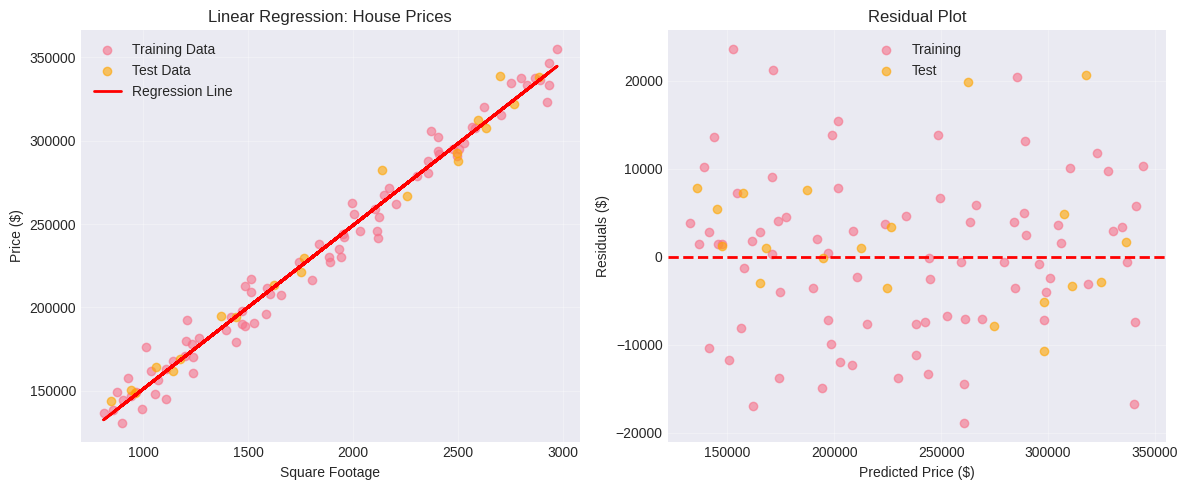

In [ ]:
# Generate sample data: House prices based on square footage
np.random.seed(42)
square_footage = np.random.uniform(800, 3000, 100)
# Price = 100 * sqft + 50000 + noise
house_prices = 100 * square_footage + 50000 + np.random.normal(0, 10000, 100)

# Create DataFrame
df = pd.DataFrame({
    'SquareFootage': square_footage,
    'Price': house_prices
})

# Split data
X = df[['SquareFootage']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Linear Regression Results:")
print(f"Intercept (β₀): ${lr_model.intercept_:,.2f}")
print(f"Coefficient (β₁): ${lr_model.coef_[0]:,.2f} per square foot")
print(f"\nTraining Set:")
print(f"  MSE: {train_mse:,.2f}")
print(f"  RMSE: ${np.sqrt(train_mse):,.2f}")
print(f"  R²: {train_r2:.4f}")
print(f"\nTest Set:")
print(f"  MSE: {test_mse:,.2f}")
print(f"  RMSE: ${np.sqrt(test_mse):,.2f}")
print(f"  R²: {test_r2:.4f}")

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.6, label='Training Data')
plt.scatter(X_test, y_test, alpha=0.6, color='orange', label='Test Data')
plt.plot(X_train, y_train_pred, 'r-', linewidth=2, label='Regression Line')
plt.xlabel('Square Footage')
plt.ylabel('Price ($)')
plt.title('Linear Regression: House Prices')
plt.legend()
plt.grid(True, alpha=0.3)

# Residuals plot
plt.subplot(1, 2, 2)
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred
plt.scatter(y_train_pred, residuals_train, alpha=0.6, label='Training')
plt.scatter(y_test_pred, residuals_test, alpha=0.6, color='orange', label='Test')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.title('Residual Plot')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Example 2: Multiple Linear Regression

Now let's work with multiple features:


Multiple Linear Regression Results:
Intercept (β₀): $255,554.31

Coefficients:
  SquareFootage: $66,551.33
  Bedrooms: $23,371.64
  Age: $-10,027.81

Training Set - R²: 0.9576, RMSE: $15,423.58
Test Set - R²: 0.9634, RMSE: $14,392.47


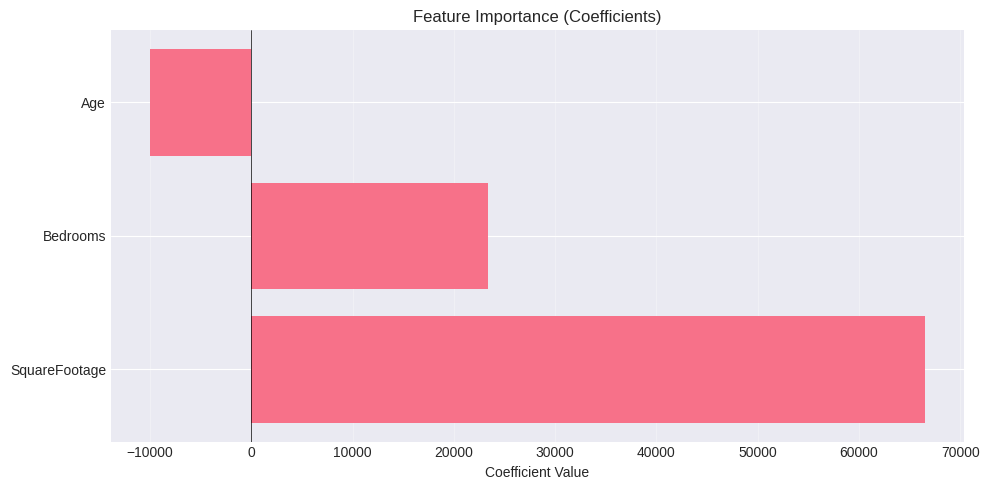

In [ ]:
# Generate data with multiple features
np.random.seed(42)
n_samples = 200

# Features: square footage, bedrooms, age
square_footage = np.random.uniform(800, 3000, n_samples)
bedrooms = np.random.randint(1, 5, n_samples)
age = np.random.uniform(0, 50, n_samples)

# Price depends on all features
price = (100 * square_footage +
         20000 * bedrooms -
         500 * age +
         30000 +
         np.random.normal(0, 15000, n_samples))

df_multi = pd.DataFrame({
    'SquareFootage': square_footage,
    'Bedrooms': bedrooms,
    'Age': age,
    'Price': price
})

# Prepare data
X_multi = df_multi[['SquareFootage', 'Bedrooms', 'Age']]
y_multi = df_multi['Price']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Scale features (good practice for multiple regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_m)
X_test_scaled = scaler.transform(X_test_m)

# Train model
lr_multi = LinearRegression()
lr_multi.fit(X_train_scaled, y_train_m)

# Predictions
y_train_pred_m = lr_multi.predict(X_train_scaled)
y_test_pred_m = lr_multi.predict(X_test_scaled)

# Metrics
print("Multiple Linear Regression Results:")
print(f"Intercept (β₀): ${lr_multi.intercept_:,.2f}")
print(f"\nCoefficients:")
feature_names = ['SquareFootage', 'Bedrooms', 'Age']
for name, coef in zip(feature_names, lr_multi.coef_):
    print(f"  {name}: ${coef:,.2f}")

print(f"\nTraining Set - R²: {r2_score(y_train_m, y_train_pred_m):.4f}, RMSE: ${np.sqrt(mean_squared_error(y_train_m, y_train_pred_m)):,.2f}")
print(f"Test Set - R²: {r2_score(y_test_m, y_test_pred_m):.4f}, RMSE: ${np.sqrt(mean_squared_error(y_test_m, y_test_pred_m)):,.2f}")

# Feature importance visualization
plt.figure(figsize=(10, 5))
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_multi.coef_
})
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Coefficients)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


### Example 3: Regularization - Ridge, Lasso, and Elastic Net

Let's compare different regularization techniques:


Model Comparison:
                            Model  Train MSE  Test MSE  Train R²  Test R²  Non-zero Coefs
                Linear Regression   0.191868  0.257321  0.965687 0.963269              20
                    Ridge (α=1.0)   0.194240  0.275431  0.965263 0.960684              20
                    Lasso (α=0.1)   0.281769  0.374308  0.949609 0.946570               5
Elastic Net (α=0.1, l1_ratio=0.5)   0.271057  0.386516  0.951525 0.944828              10


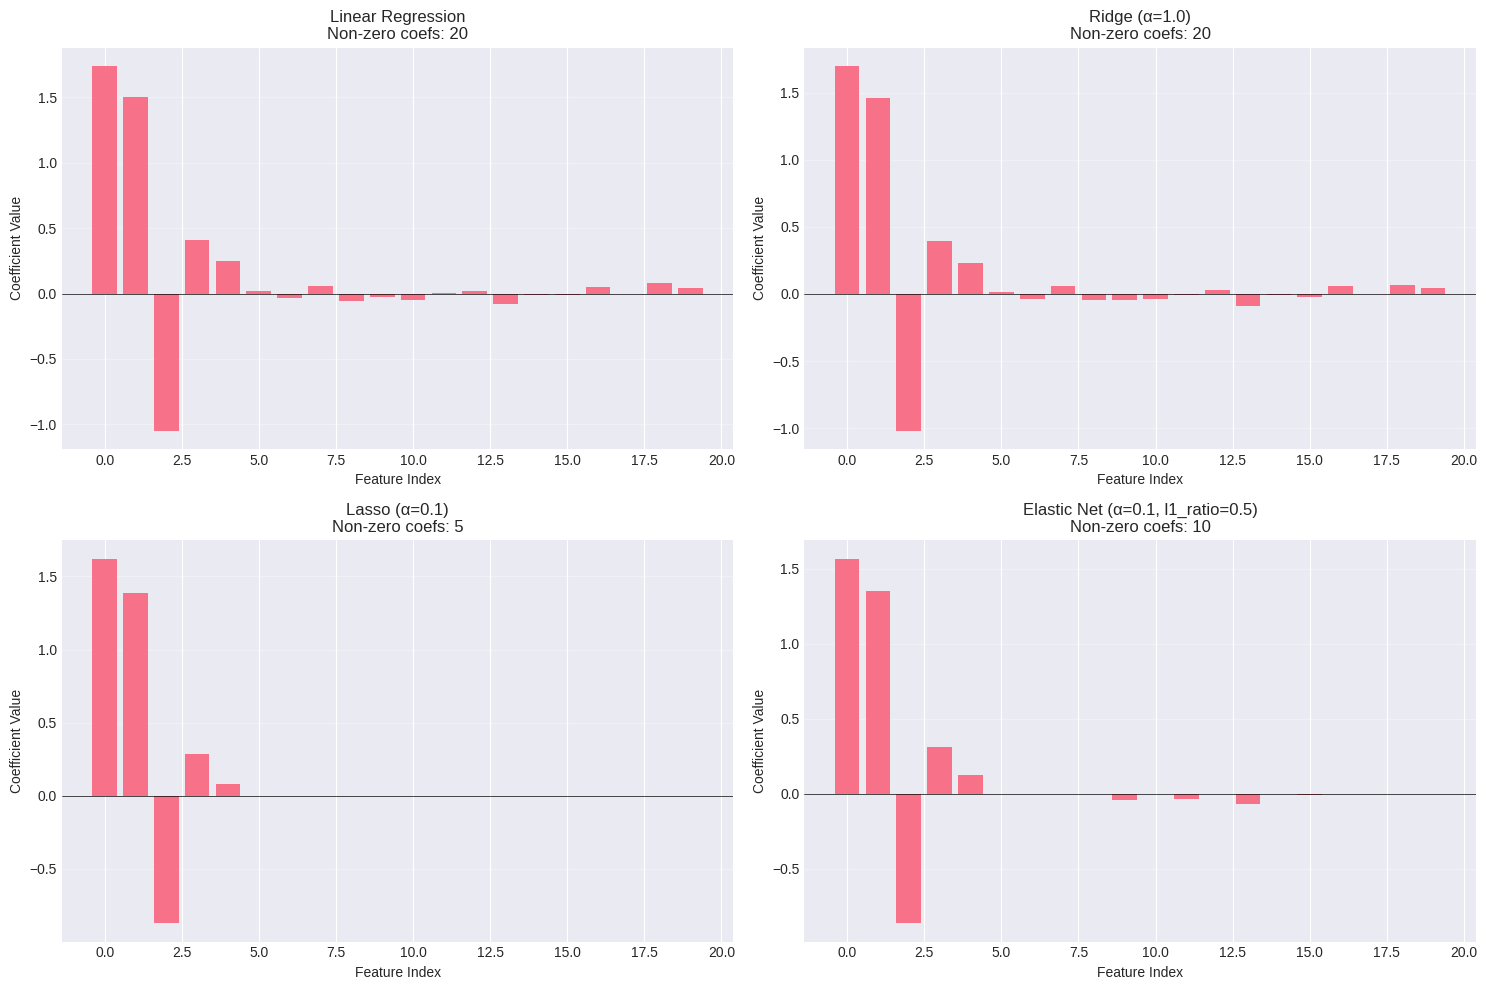


Observations:
- Linear Regression: Uses all features, may overfit
- Ridge: Shrinks all coefficients but keeps them non-zero
- Lasso: Sets many coefficients to exactly zero (feature selection)
- Elastic Net: Balances Ridge and Lasso benefits


In [ ]:
# Create data with many features (some irrelevant)
np.random.seed(42)
n_samples = 100
n_features = 20

# Generate features
X_reg = np.random.randn(n_samples, n_features)
# Only first 5 features are actually relevant
y_reg = (2 * X_reg[:, 0] +
         1.5 * X_reg[:, 1] +
         -1 * X_reg[:, 2] +
         0.5 * X_reg[:, 3] +
         0.3 * X_reg[:, 4] +
         np.random.randn(n_samples) * 0.5)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# Scale features (important for regularization)
scaler_reg = StandardScaler()
X_train_r_scaled = scaler_reg.fit_transform(X_train_r)
X_test_r_scaled = scaler_reg.transform(X_test_r)

# Train different models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (α=1.0)': Ridge(alpha=1.0),
    'Lasso (α=0.1)': Lasso(alpha=0.1),
    'Elastic Net (α=0.1, l1_ratio=0.5)': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = []

for name, model in models.items():
    model.fit(X_train_r_scaled, y_train_r)
    train_pred = model.predict(X_train_r_scaled)
    test_pred = model.predict(X_test_r_scaled)

    train_mse = mean_squared_error(y_train_r, train_pred)
    test_mse = mean_squared_error(y_test_r, test_pred)
    train_r2 = r2_score(y_train_r, train_pred)
    test_r2 = r2_score(y_test_r, test_pred)

    # Count non-zero coefficients (for Lasso/Elastic Net)
    if hasattr(model, 'coef_'):
        n_nonzero = np.sum(np.abs(model.coef_) > 1e-6)
    else:
        n_nonzero = len(model.coef_)

    results.append({
        'Model': name,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Non-zero Coefs': n_nonzero
    })

# Display results
results_df = pd.DataFrame(results)
print("Model Comparison:")
print(results_df.to_string(index=False))

# Visualize coefficients
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    if hasattr(model, 'coef_'):
        axes[idx].bar(range(len(model.coef_)), model.coef_)
        axes[idx].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        axes[idx].set_title(f'{name}\nNon-zero coefs: {np.sum(np.abs(model.coef_) > 1e-6)}')
        axes[idx].set_xlabel('Feature Index')
        axes[idx].set_ylabel('Coefficient Value')
        axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- Linear Regression: Uses all features, may overfit")
print("- Ridge: Shrinks all coefficients but keeps them non-zero")
print("- Lasso: Sets many coefficients to exactly zero (feature selection)")
print("- Elastic Net: Balances Ridge and Lasso benefits")


### Example 4: Polynomial Regression

Demonstrating polynomial regression for non-linear relationships:


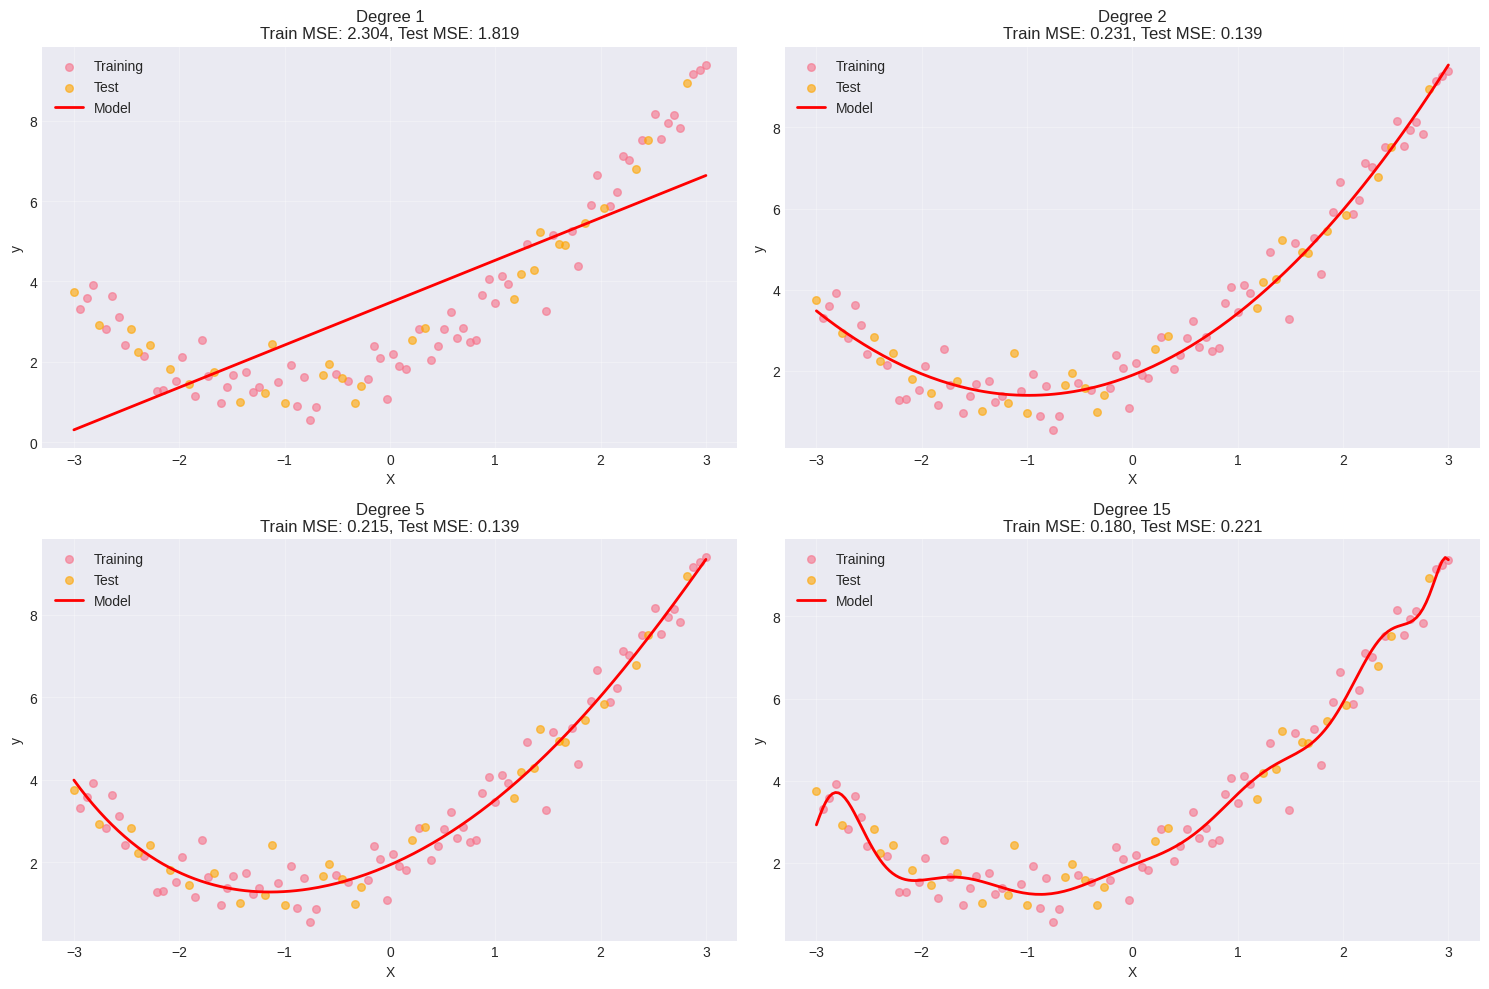


Key Observations:
- Degree 1 (Linear): Underfitting - too simple for the data
- Degree 2 (Quadratic): Good fit - captures the true relationship
- Degree 5: Still reasonable but starting to overfit
- Degree 15: Severe overfitting - fits noise in training data


In [ ]:
# Generate non-linear data
np.random.seed(42)
X_poly = np.linspace(-3, 3, 100).reshape(-1, 1)
# Quadratic relationship with noise
y_poly = 0.5 * X_poly.flatten()**2 + X_poly.flatten() + 2 + np.random.randn(100) * 0.5

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y_poly, test_size=0.3, random_state=42
)

# Fit models with different polynomial degrees
degrees = [1, 2, 5, 15]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train_p)
    X_test_poly = poly_features.transform(X_test_p)

    # Fit linear regression on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train_p)

    # Predictions for plotting
    X_plot = np.linspace(-3, 3, 200).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    # Training and test predictions
    y_train_pred_p = model.predict(X_train_poly)
    y_test_pred_p = model.predict(X_test_poly)

    # Calculate errors
    train_mse = mean_squared_error(y_train_p, y_train_pred_p)
    test_mse = mean_squared_error(y_test_p, y_test_pred_p)

    # Plot
    axes[idx].scatter(X_train_p, y_train_p, alpha=0.6, label='Training', s=30)
    axes[idx].scatter(X_test_p, y_test_p, alpha=0.6, color='orange', label='Test', s=30)
    axes[idx].plot(X_plot, y_plot, 'r-', linewidth=2, label='Model')
    axes[idx].set_title(f'Degree {degree}\nTrain MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}')
    axes[idx].set_xlabel('X')
    axes[idx].set_ylabel('y')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("- Degree 1 (Linear): Underfitting - too simple for the data")
print("- Degree 2 (Quadratic): Good fit - captures the true relationship")
print("- Degree 5: Still reasonable but starting to overfit")
print("- Degree 15: Severe overfitting - fits noise in training data")
